In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import spatial
from collections import Counter
import os
import pickle
from sklearn.decomposition import PCA
from math import log
from utils import LanguageCounter

base dir is /home/lm686/scandinavian-languages
data dir is /share/magpie/datasets/Swedish
output dir is /home/lm686/scandinavian-languages/data/Finnish/temp_txt
earliest_time is 1740


In [2]:
finCountSource = "data/Finnish/temp_txt"
sweCountSource = "data/Swedish/"
decades = [str(i) for i in range(1750, 1910, 10)]

In [3]:
fin = LanguageCounter(finCountSource)
fin.buildCommonCounters(fin.dataPath)

adding decade 1770
adding decade 1780
adding decade 1790
adding decade 1800
adding decade 1810
adding decade 1820
adding decade 1830
adding decade 1840
adding decade 1850
adding decade 1860
adding decade 1870


In [4]:
swe = LanguageCounter(sweCountSource)
swe.buildCommonCounters(swe.dataPath)

adding decade 1780
adding decade 1820
adding decade 1840
adding decade 1860
adding decade 1880
adding decade 1800
adding decade 1760
adding decade 1750
adding decade 1770
adding decade 1790
adding decade 1810
adding decade 1830
adding decade 1850
adding decade 1870
adding decade 1890


In [5]:
finYears = list(fin.allCounters.keys()) # [y.astype(datetime) for y in fin.allCounters.keys()]
sweYears = list(swe.allCounters.keys())# [y.astype(datetime) for y in swe.allCounters.keys()]

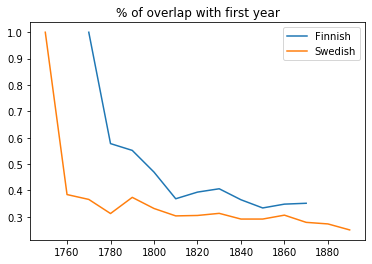

In [6]:
# Similarity wrt 1770 decade over time
_, finSimToBase = fin.getOverlaps()
plt.plot(finYears, finSimToBase, label="Finnish")

_, sweSimToBase = swe.getOverlaps()
plt.plot(sweYears, sweSimToBase, label="Swedish")
plt.legend()
plt.title("% of overlap with first year")
plt.show()

In [6]:
fin.buildFeatures()

word  ('och', 13093167) in % of texts:  1.0
word  ('att', 7109041) in % of texts:  1.0
word  ('den', 5927745) in % of texts:  1.0
word  ('till', 5756171) in % of texts:  1.0
word  ('för', 4744115) in % of texts:  1.0
word  ('som', 3915510) in % of texts:  1.0
word  ('med', 3811842) in % of texts:  1.0
word  ('det', 3183713) in % of texts:  1.0
word  ('sig', 2310128) in % of texts:  1.0
word  ('ett', 2109138) in % of texts:  1.0
word  ('icke', 1802716) in % of texts:  1.0
word  ('har', 1649863) in % of texts:  1.0
word  ('han', 1503086) in % of texts:  1.0
word  ('eller', 1233506) in % of texts:  1.0
word  ('samt', 1219247) in % of texts:  1.0
word  ('man', 1206344) in % of texts:  1.0
word  ('jag', 1062656) in % of texts:  1.0
word  ('under', 1055095) in % of texts:  1.0
word  ('vid', 1039063) in % of texts:  1.0
word  ('sin', 1004965) in % of texts:  1.0
word  ('hos', 995370) in % of texts:  1.0
word  ('från', 959604) in % of texts:  1.0
word  ('denna', 956351) in % of texts:  1.0
wor

In [7]:
swe.buildFeatures()

word  ('och', 8797507) in % of texts:  1.0
word  ('att', 4338934) in % of texts:  1.0
word  ('till', 4184704) in % of texts:  1.0
word  ('den', 3773970) in % of texts:  1.0
word  ('för', 3011790) in % of texts:  1.0
word  ('med', 2494393) in % of texts:  1.0
word  ('som', 2305741) in % of texts:  1.0
word  ('det', 2141029) in % of texts:  1.0
word  ('ett', 1543461) in % of texts:  1.0
word  ('sig', 1369393) in % of texts:  1.0
word  ('han', 1081186) in % of texts:  1.0
word  ('har', 1077902) in % of texts:  1.0
word  ('samt', 945320) in % of texts:  1.0
word  ('icke', 904895) in % of texts:  1.0
word  ('från', 882296) in % of texts:  1.0
word  ('under', 837031) in % of texts:  1.0
word  ('wid', 832402) in % of texts:  1.0
word  ('eller', 821835) in % of texts:  1.0
word  ('hos', 811937) in % of texts:  1.0
word  ('jag', 800365) in % of texts:  1.0
word  ('man', 758882) in % of texts:  1.0
word  ('men', 671261) in % of texts:  1.0
word  ('vid', 666384) in % of texts:  1.0
word  ('frän',

In [7]:
similarity = [1-spatial.distance.cosine(fin.allFeatize[0], fin.allFeatize[i]) for i in range(len(fin.allFeatize))]
plt.plot(finYears, similarity, label="Finnish")
similarity = [1-spatial.distance.cosine(swe.allFeatize[0], swe.allFeatize[i]) for i in range(len(swe.allFeatize))]
plt.plot(sweYears, similarity, label="Swedish")
plt.title("Similarity to first decade over time")
plt.legend()
plt.show()

AttributeError: 'LanguageCounter' object has no attribute 'allFeatize'

In [9]:
pca = PCA(n_components=4)
pca_result= pca.fit_transform(fin.allFeatize)

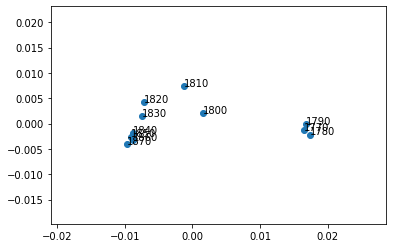

In [10]:
x = pca_result[:, 0]
y = pca_result[:,1]
plt.scatter(x, y)
for i in range(len(list(fin.allCounters.keys()))):
    plt.annotate(list(fin.allCounters.keys())[i], (x[i], y[i]))
plt.show()

## Project with both languages

In [11]:
# Find top 250 most frequent words across both langauges, based on frequency
totalSwed = sum([s[1] for s in swe.topWordsCounter])
freqsSwed = []
for c in swe.topWordsCounter:
    freqsSwed += [(c[0], c[1]/totalSwed)]
    
totalFin = sum([s[1] for s in fin.topWordsCounter])
freqsFin = []
for c in fin.topWordsCounter:
    freqsFin += [(c[0], c[1]/totalFin)]

In [12]:
combined = Counter()
for word in freqsSwed: 
    combined[word[0]] += word[1]
for word in freqsFin: 
    combined[word[0]] += word[1]

In [13]:
sweAllFeatize = []
for counter in list(swe.allCounters.values()):
    lenDoc = sum(counter.values())
    #featize = np.array([counter[combined[i][0]] for i in range(len(combined))])
    featize = np.array([counter[k] for k,v in combined.items()])
    featize = np.divide(featize, lenDoc)
    sweAllFeatize += [featize]
    
finAllFeatize = []
for counter in list(fin.allCounters.values()):
    lenDoc = sum(counter.values())
    #featize = np.array([counter[combined[i][0]] for i in range(len(combined))])
    featize = np.array([counter[k] for k,v in combined.items()])
    featize = np.divide(featize, lenDoc)
    finAllFeatize += [featize]

In [14]:
print(len(sweAllFeatize), len(finAllFeatize))

15 11


In [15]:
pca = PCA(n_components=4)
pca_result= pca.fit_transform(sweAllFeatize + finAllFeatize)

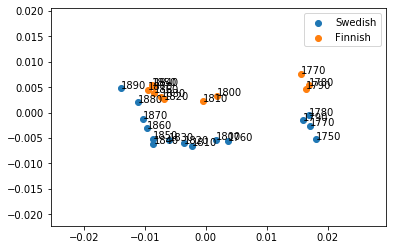

In [21]:
x_swe = pca_result[:15, 0]
x_fin = pca_result[15:,0]
y_swe = pca_result[:15,1]
y_fin = pca_result[15:,1]
plt.scatter(x_swe, y_swe, label="Swedish")
for i in range(len(list(swe.allCounters.keys()))):
    plt.annotate(list(swe.allCounters.keys())[i], (x_swe[i], y_swe[i]))
    
plt.scatter(x_fin, y_fin, label="Finnish")
for i in range(len(list(fin.allCounters.keys()))):
    plt.annotate(list(fin.allCounters.keys())[i], (x_fin[i], y_fin[i]))
plt.legend()

plt.show()

# Initial Qualitative Analysis
* "wid" in Finnish vs. "vid" in Swedish- are they same word/different spelling? 
* från(F) vs. frän (S)
* Helsingfors (F), stockholm (S) & norrkoping
* Words I'm not sure about: amp, Det, sina, ore, 
* Generally similar words, but different orderings


In [65]:
print(fin.topWordsTotal[:50], "\n", swe.topWordsTotal[:50])

['och', 'att', 'den', 'till', 'för', 'som', 'med', 'det', 'sig', 'ett', 'icke', 'har', 'han', 'eller', 'samt', 'man', 'jag', 'under', 'vid', 'sin', 'hos', 'från', 'denna', 'wid', 'men', 'genom', 'alla', 'frän', 'hade', 'detta', 'efter', 'uti', 'skulle', 'der', 'utan', 'Den', 'Helsingfors', 'andra', 'kan', 'dem', 'mig', 'honom', 'hans', 'sina', 'Det', 'äro', 'var', 'hon', 'amp', 'skall'] 
 ['och', 'att', 'till', 'den', 'för', 'med', 'som', 'det', 'ett', 'sig', 'han', 'har', 'samt', 'icke', 'från', 'under', 'wid', 'eller', 'hos', 'jag', 'man', 'men', 'vid', 'frän', 'denna', 'sin', 'alla', 'efter', 'hade', 'genom', 'detta', 'kan', 'öre', 'sorn', 'uti', 'var', 'der', 'hon', 'norrköping', 'andra', 'honom', 'mot', 'hans', 'äro', 'utan', 'oell', 'stockholm', 'kunna', 'mig', 'skulle']


In [66]:
print("in F but not S: ", set(fin.topWordsTotal[:50]).difference(swe.topWordsTotal[:50]))
print("in S but not F: ", set(swe.topWordsTotal[:50]).difference(fin.topWordsTotal[:50]) )

in F but not S:  {'amp', 'Det', 'sina', 'skall', 'Helsingfors', 'Den', 'dem'}
in S but not F:  {'stockholm', 'norrköping', 'öre', 'kunna', 'oell', 'sorn', 'mot'}


## Overlapping Words

In [67]:
totalFin = [sum(c) for c in fin.allCounters.values()]
totalSwe = sum(swe.allCounters.values(), Counter())

In [19]:
overlaps = []
simToBase = []
for i in range(len(fin.commonWords)-1):
    overlaps += [(set(fin.commonWords[i]).intersection(fin.commonWords[i+1]))]

In [46]:
for i in range(len(fin.commonWords)-1):
    decade = list(fin.commonWords.keys())[i]
    overlaps += [fin.commonWords[decade].intersection(decade)]

In [67]:
finEntireOverlap = set.intersection(*[set(v) for k, v in fin.commonWords.items()])
sweEntireOverlap = set.intersection(*[set(v) for k, v in swe.commonWords.items()])

print("Finnish overlap words {:d}: \n{:s}".format(len(finEntireOverlap), str(finEntireOverlap)))
print("Swedish overlap words {:d}: \n{:s}".format(len(sweEntireOverlap), str(sweEntireOverlap)))

Finnish overlap words 63: 
{'han', 'hos', 'sin', 'frän', 'emot', 'med', 'sig', 'kunde', 'hon', 'genom', 'mera', 'hans', 'Den', 'endast', 'tid', 'denna', 'detta', 'äro', 'kan', 'som', 'efter', 'wid', 'första', 'alt', 'del', 'uti', 'alla', 'deras', 'och', 'all', 'den', 'Det', 'här', 'till', 'sedan', 'men', 'sina', 'min', 'icke', 'har', 'kunna', 'hade', 'der', 'andra', 'under', 'för', 'dag', 'samma', 'eller', 'man', 'honom', 'dem', 'Men', 'hela', 'ock', 'ännu', 'mig', 'utan', 'jag', 'att', 'samt', 'det', 'amp'}
Swedish overlap words 36: 
{'han', 'hos', 'sin', 'sig', 'med', 'hans', 'denna', 'detta', 'äro', 'kan', 'som', 'efter', 'stockholm', 'alla', 'och', 'den', 'här', 'till', 'sedan', 'icke', 'har', 'hade', 'andra', 'under', 'för', 'samma', 'eller', 'man', 'honom', 'mig', 'ett', 'utan', 'jag', 'samt', 'det', 'men'}
